In [51]:
import numpy as np
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
from Fun4CNNFc import *
from read_Fc import read_Fc
from Fun4RegCNN import *
from sklearn.model_selection import train_test_split
from tqdm import tqdm 

In [2]:
connectomes_fc = []
ROIs = []
scores = []

#%%  Directories

current_path = os.getcwd()
#parentPath = os.path.abspath(os.path.join(current_path, '../../'))
#D:/Docs/Encef/
path2fc = "camcan_AEC_ortho_AnteroPosterior"
print(path2fc)
#path2demo = parentPath+'/NewThesis_db_DK/camcan_demographics/'
FcFile = np.sort(os.listdir(path2fc))

camcan_AEC_ortho_AnteroPosterior


Loading the Demographics and score table...


c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
c:\Users\diego\anaconda3\envs\NeuralNetworks\Lib\site-packages\seaborn\axis

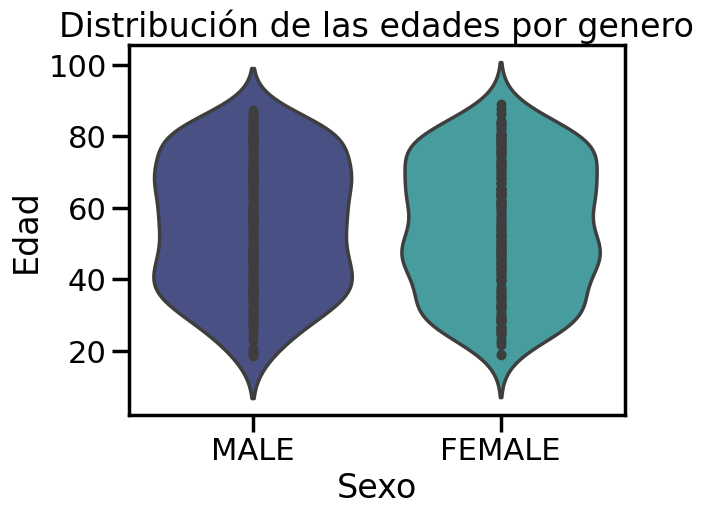

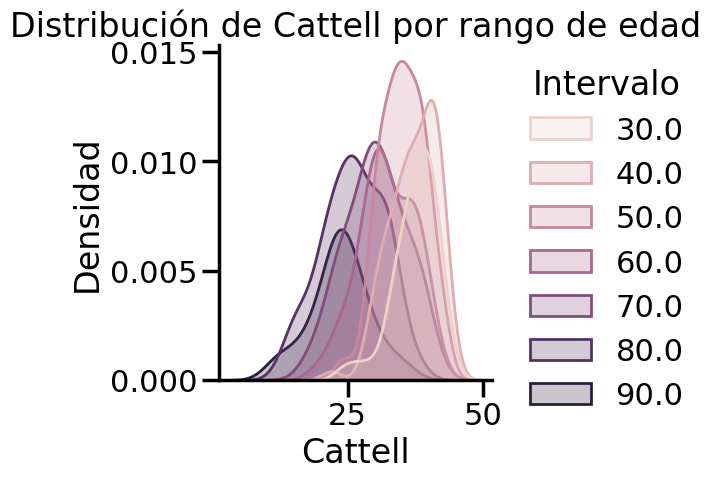

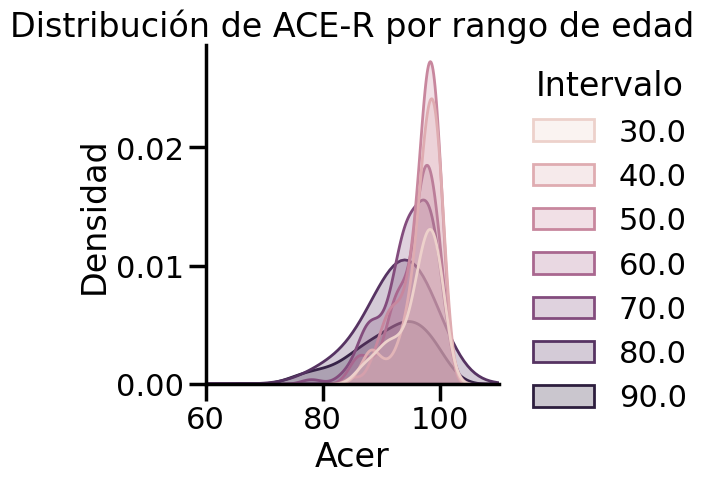

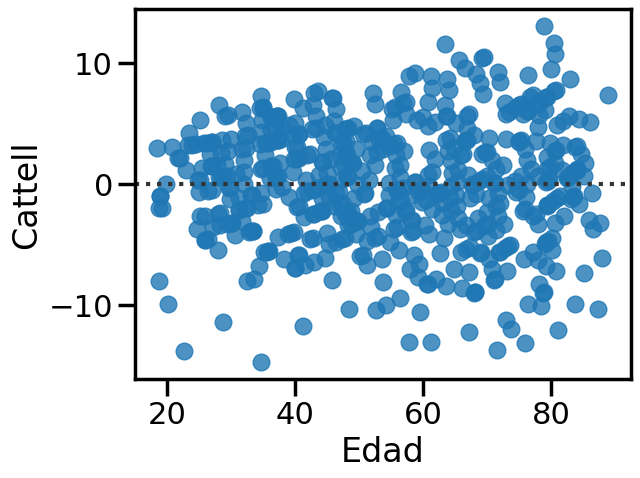

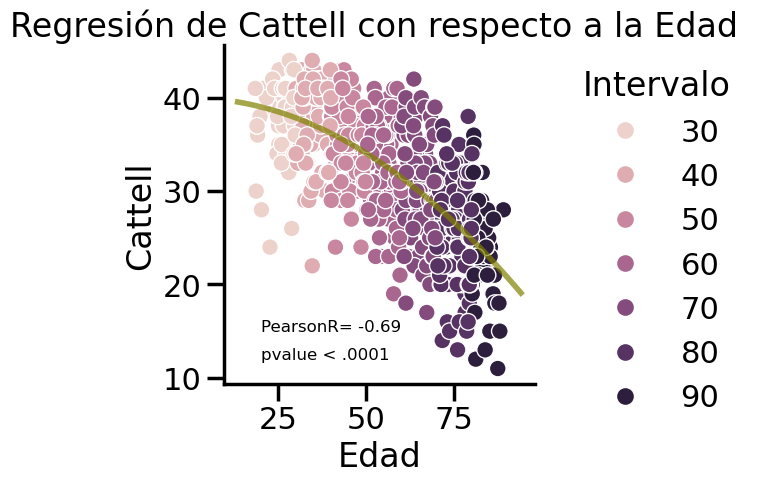

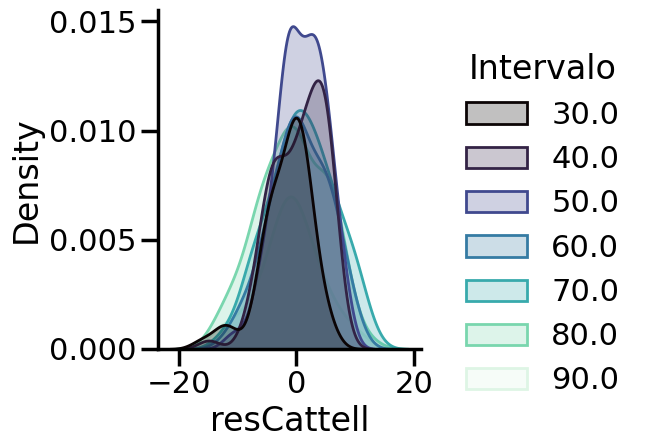

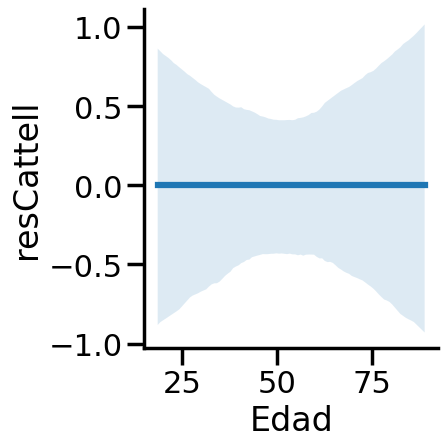

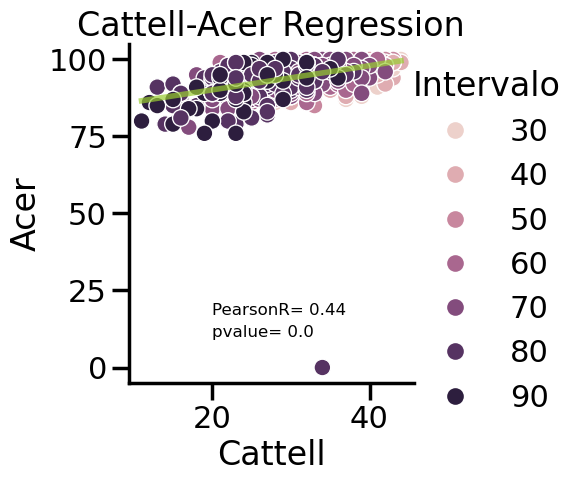

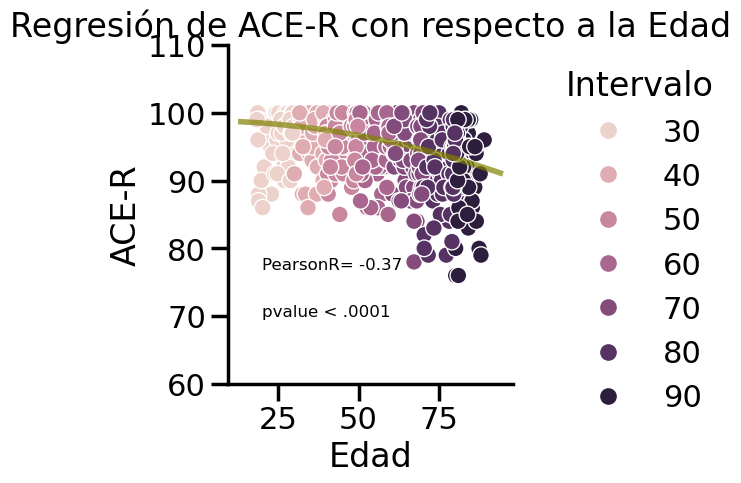

100%|██████████| 606/606 [00:20<00:00, 29.74it/s]


In [3]:
#%% Find nan values in the score dataframe
# import Fun4newThesis
# reload(Fun4newThesis)

print('Loading the Demographics and score table...')
with open(current_path+'/scoreDf_spanish.pickle', 'rb') as f:
    scoreDf = pickle.load(f)

#lets just keep age for now:
# scoreDf.drop(columns=['Acer','BentonFaces','Cattell','EmotionRecog','Hotel','Ppp','Synsem','VSTM'],inplace=True)
scoreDf.drop(columns=['BentonFaces','ReconocimientoEmociones', 'ForceMatch', 'Hotel', 'Ppp', 'Synsem',
        'VSTM'],inplace=True)
# scoreDf.drop(columns=['Acer','BentonFaces','Cattell','ReconocimientoEmociones', 'ForceMatch', 'Hotel', 'Ppp', 'Synsem',
#         'VSTM'],inplace=True)
row_idx=np.unique(np.where(np.isnan(scoreDf.iloc[:,3:-1].to_numpy()))[0])#rows where there is nan
scoreDf_noNan=scoreDf.drop(row_idx).reset_index(drop=True)
scoreDf_noNan=scoreDf_noNan.drop(np.argwhere(scoreDf_noNan['ID']=='sub_CC721434')[0][0]).reset_index(drop=True)# drop beacuase there is missing connections at the the struct connectomics
PltDistDemographics(scoreDf_noNan)
edad=np.array(scoreDf_noNan['Edad']).reshape(-1,1)
subjects=scoreDf_noNan['ID']

#%% Read Fc
connectomes_fc, ROIs = read_Fc(FcFile,path2fc, subjects,thresholding='MST', per=100) #nt = no threshold
for key in connectomes_fc.keys():
    connectomes_fc[key] = np.expand_dims(connectomes_fc[key],-1) # we need to expand the dimensions to be able to concatenate the bands

In [9]:
subjects.shape

(567,)

(453, 2278)
[66.21445228 46.16632579 63.32548411 51.89165597 58.10134752]


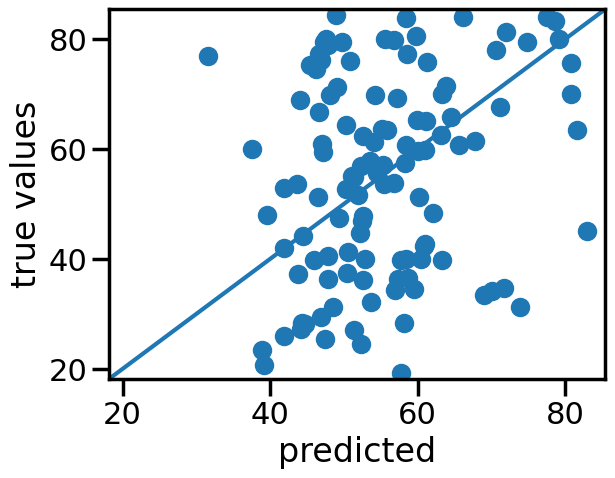

(453, 2278)
[66.96156128 37.47705355 57.49215225 47.94599751 61.16549061]
(453, 2278)
[64.73697597 44.77906889 95.36642234 53.94641295 45.63218523]
(453, 2278)
[41.34007121 43.92512856 81.92780936 69.13744748 48.8327522 ]
(453, 2278)
[52.04426846 45.06873669 48.18802589 65.06597176 65.49190047]
(453, 2278)
[ 60.58247188  45.54374337  68.35547704 113.03541087 115.93667544]
(453, 2278)
[43.80485065 51.93096724 55.26555079 57.6421827  62.0525642 ]
(453, 2278)
[57.40635376 63.12073113 55.22132105 71.75556735 56.82103006]
(453, 2278)
[66.20797686 60.12272731 68.2744052  43.36177538 62.73848105]
(453, 2278)
[49.70592099 47.75416144 51.94601781 49.95987417 58.32232797]
(453, 2278)
[72.61369344 53.18138707 50.60601972 53.28469319 48.03042564]


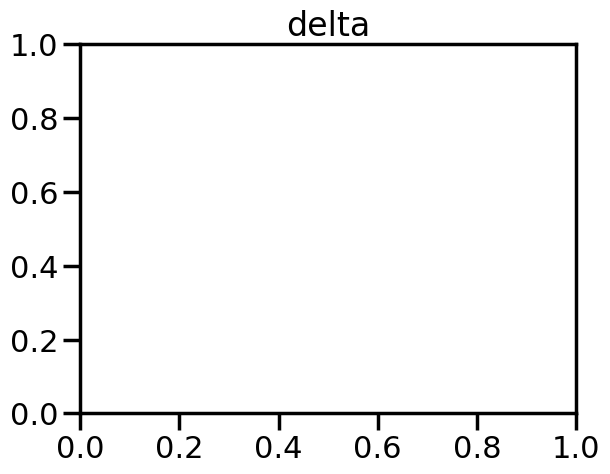

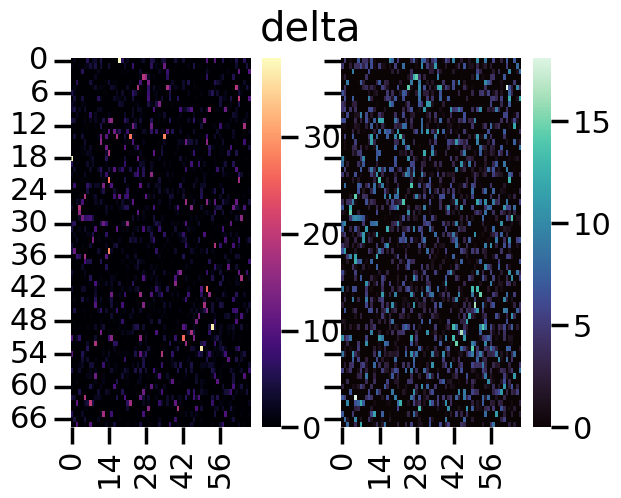

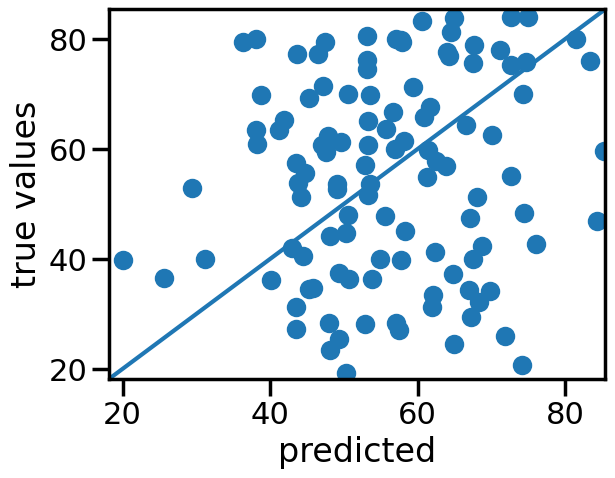

(453, 2278)
[82.95792441 59.04186904 28.36556082 63.43064278 41.16995702]
(453, 2278)
[48.06593299 52.9211175  41.35756744 56.06786145 46.34152149]
(453, 2278)
[49.36172736 77.69759158 57.8920516  53.65328457 72.02725153]
(453, 2278)
[48.65943757 59.91947207 53.42094262 85.09901968 70.05331975]
(453, 2278)
[41.64616542 67.51732122  7.33528687 50.56804423 72.7952309 ]
(453, 2278)
[51.63104067 56.44640795 48.83002627 58.21416249 52.76248022]
(453, 2278)
[57.77674152 70.52187048 56.48205832 74.64504415 38.92325286]
(453, 2278)
[70.49733174 42.77047245 39.23672658 46.36174576 58.59262271]
(453, 2278)
[62.90013383 59.23927547 43.16378001 51.09207137 48.80068665]
(453, 2278)
[57.94436603 50.45371351 42.11556549 57.05693165 54.84263315]


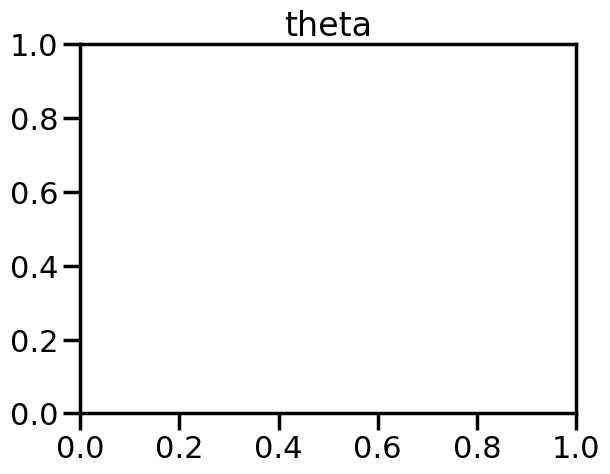

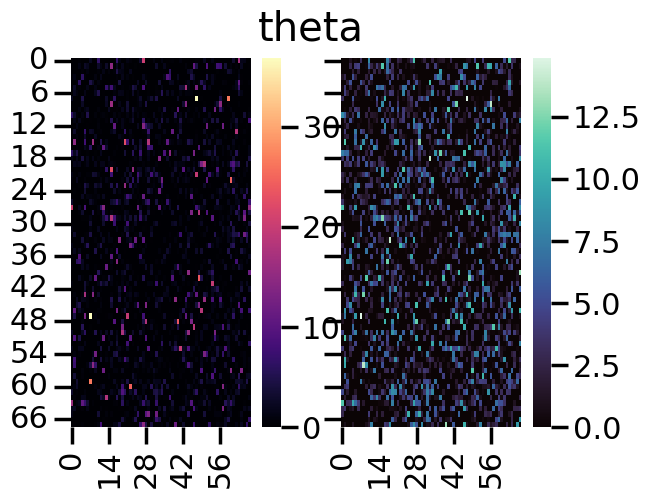

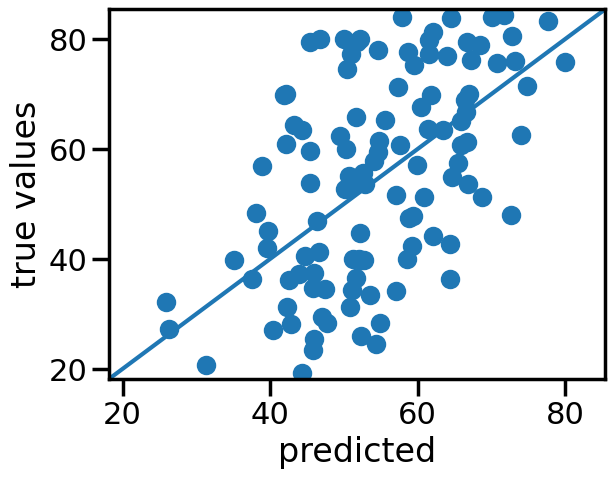

(453, 2278)
[73.14486183 42.15391218 47.72610426 63.13461889 47.84978168]
(453, 2278)
[50.07741801 49.6440049  73.47888401 54.74056452 49.20234521]
(453, 2278)
[66.85947171 70.85029844 51.82249132 63.0428466  53.20753624]
(453, 2278)
[77.98281234 51.36968682 66.43758117 69.59762598 43.96562114]
(453, 2278)
[38.96861825 45.98888694 52.69012811 67.05005517 51.0562285 ]
(453, 2278)
[46.54990774 49.29145538 56.09201782 39.977657   50.51490556]
(453, 2278)
[74.52983086 73.30957034 45.40975062 64.17659682 47.79008535]
(453, 2278)
[52.03778757 66.30941373 63.21200682 40.82943757 48.2958318 ]
(453, 2278)
[34.05414327 65.07390143 52.13027293 65.44554083 41.99302165]
(453, 2278)
[58.64198775 51.69013275 51.37319037 54.47637425 50.66186741]


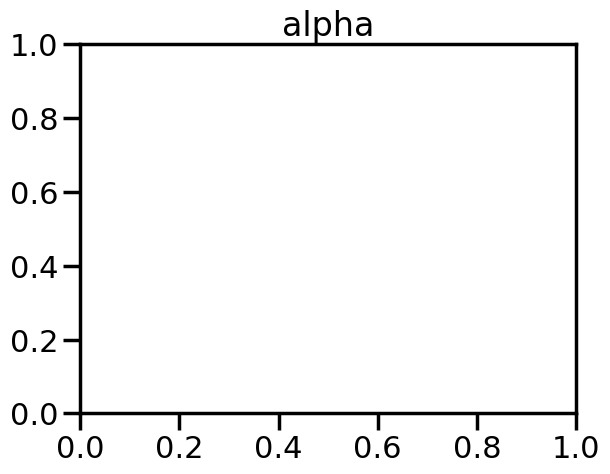

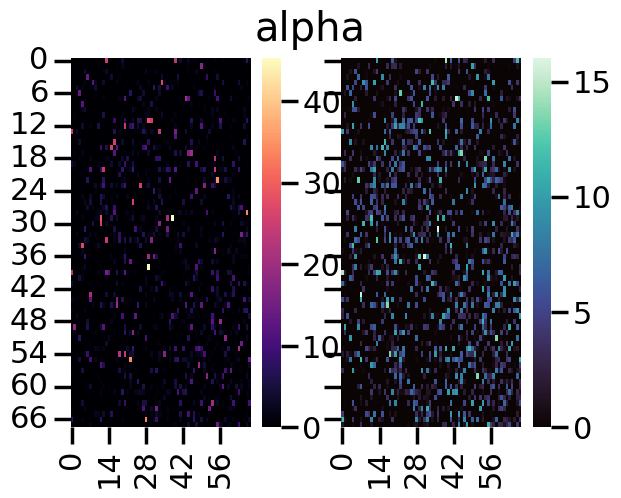

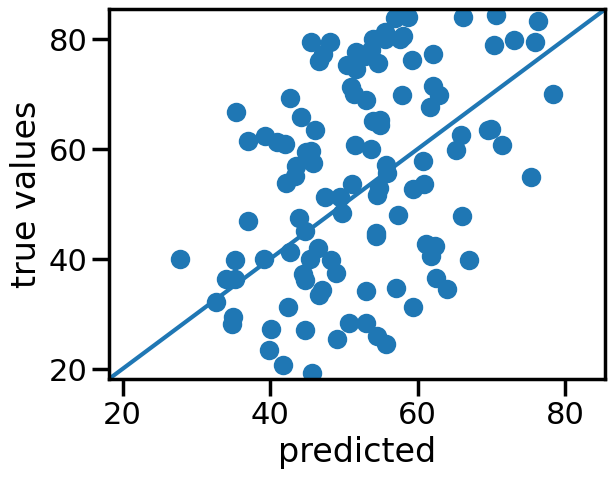

(453, 2278)
[57.06939518 44.81018485 42.41079208 70.16855194 66.05984176]
(453, 2278)
[49.30758706 51.13354522 55.36118953 55.87888901 55.21799594]
(453, 2278)
[47.47576667 64.37744645 63.05979475 59.6338712  46.38110308]
(453, 2278)
[61.06029309 43.93359335 45.427208   64.48185651 66.35565043]
(453, 2278)
[43.97651387 52.86130375 38.31848698 83.55615198 61.08316775]
(453, 2278)
[52.76329507 57.07258444 44.67364075 52.56664185 52.21091759]
(453, 2278)
[67.85171218 74.60706022 55.49080605 51.39187243 43.39487948]
(453, 2278)
[55.90371456 45.09890579 78.4938324  54.01385104 51.88946998]
(453, 2278)
[46.59457221 43.44985859 40.0940082  44.91214689 41.33581512]
(453, 2278)
[52.09402948 53.76471544 55.75628255 25.18393216 53.27479099]


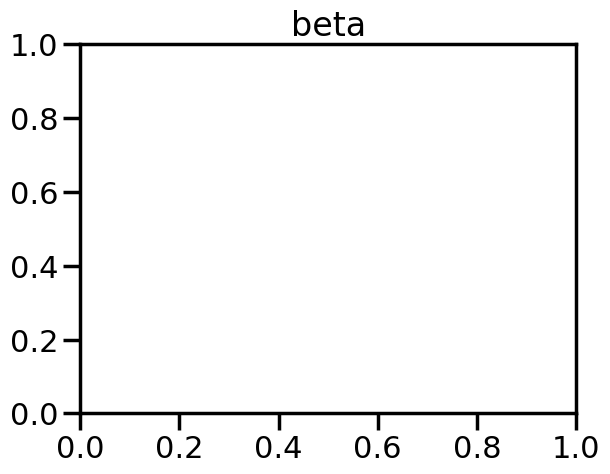

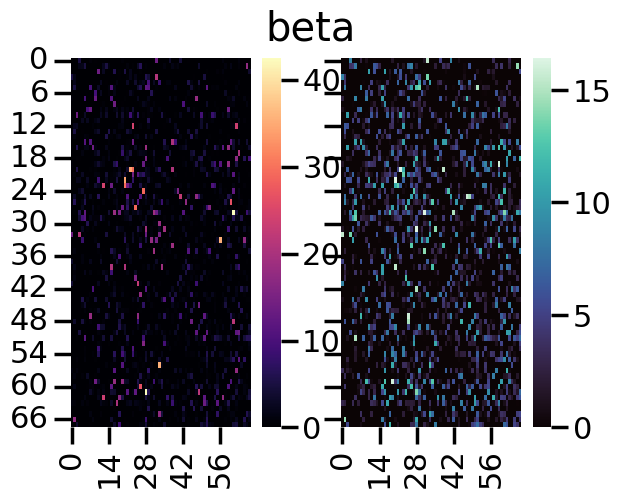

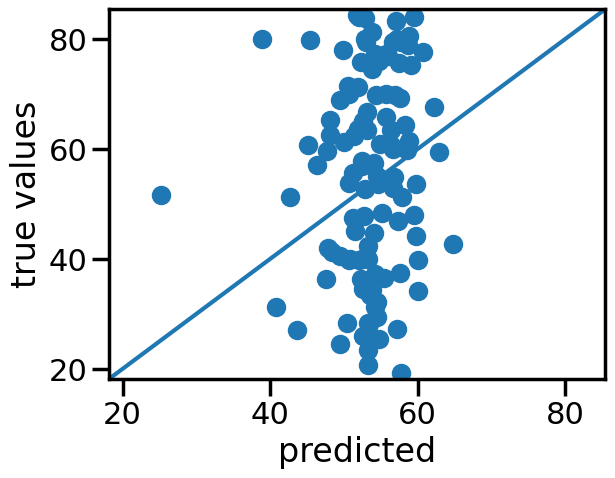

(453, 2278)
[43.70082187 54.98214694 51.24029738 52.89036119 53.85067598]
(453, 2278)
[51.86228038 52.51101371 49.70440849 54.77279544 59.92993363]
(453, 2278)
[53.70328727 54.34182847 57.20840333 62.60758087 53.51726153]
(453, 2278)
[53.54542561 47.62695855 82.56056031 43.82300247 56.1532914 ]
(453, 2278)
[56.67603415 52.54897984 54.17590435 68.17747221 44.3373543 ]
(453, 2278)
[50.92139189 56.08810637 57.75847268 51.76320651 59.24091443]
(453, 2278)
[56.16604077 66.61517194 49.1145626  53.65043523 54.42917341]
(453, 2278)
[54.35376851 59.06650405 53.32100418 52.11577489 54.92248219]
(453, 2278)
[53.4918233  53.21306095 55.15020668 55.10822873 41.50614189]
(453, 2278)
[56.01434805 51.01070338 56.29490386 37.39749928 47.67333811]


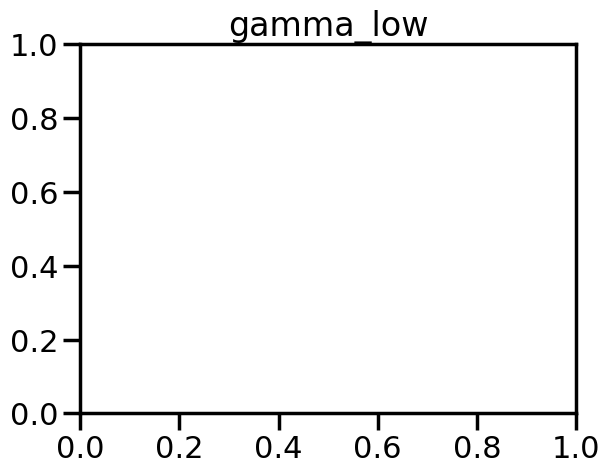

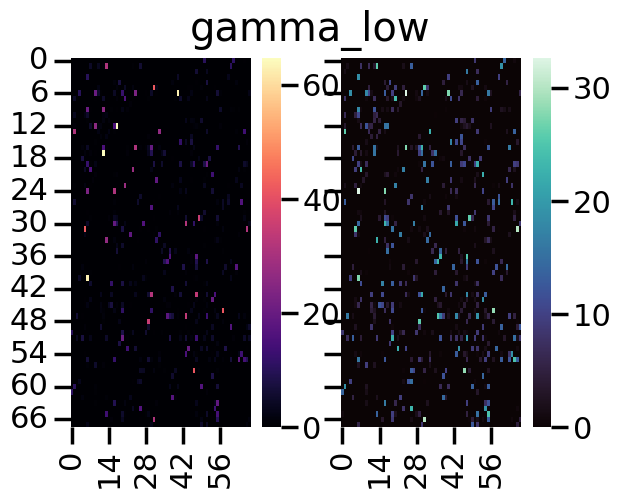

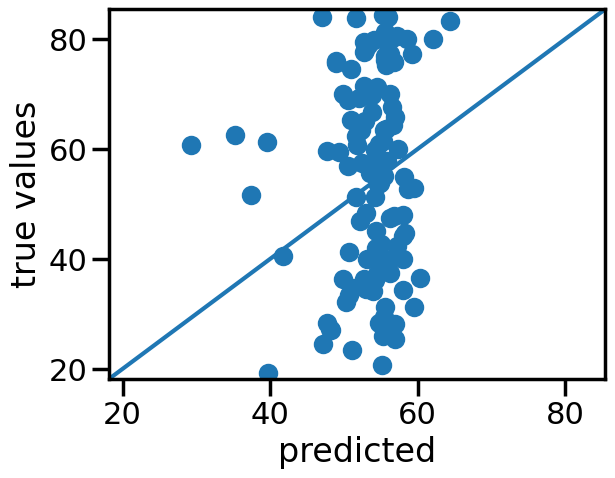

(453, 2278)
[49.48159478 56.4802764  55.53963339 56.39927158 52.42698451]
(453, 2278)
[51.74874462 67.22094264 53.75510585 55.87897937 57.59752946]
(453, 2278)
[55.28227571 55.56571043 48.24271936 60.16415719 54.20803548]
(453, 2278)
[54.49708702 56.94802948 80.72154297 52.20488435 51.97554242]
(453, 2278)
[52.88079175 54.8517307  59.33847806 62.38742008 39.61094095]
(453, 2278)
[51.77021016 51.34335436 70.26354934 48.78122153 57.3266639 ]
(453, 2278)
[53.6110387  64.26942928 50.90489673 52.81711909 49.67978897]
(453, 2278)
[57.31730072 52.18483494 52.43080192 65.49602931 60.72710391]
(453, 2278)
[50.72326864 55.9106466  49.26545081 54.91265315 48.49685269]


<Axes: xlabel='variable', ylabel='value'>

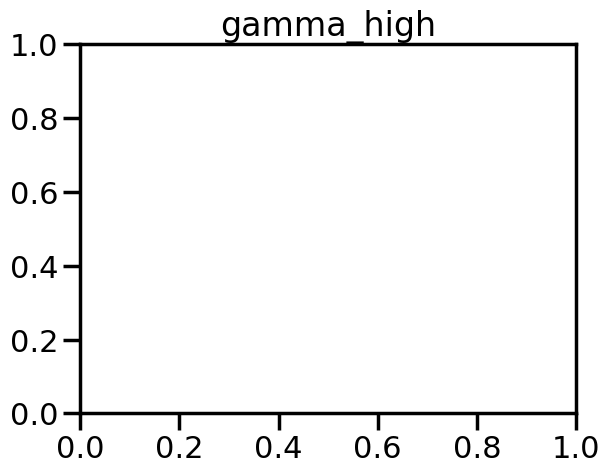

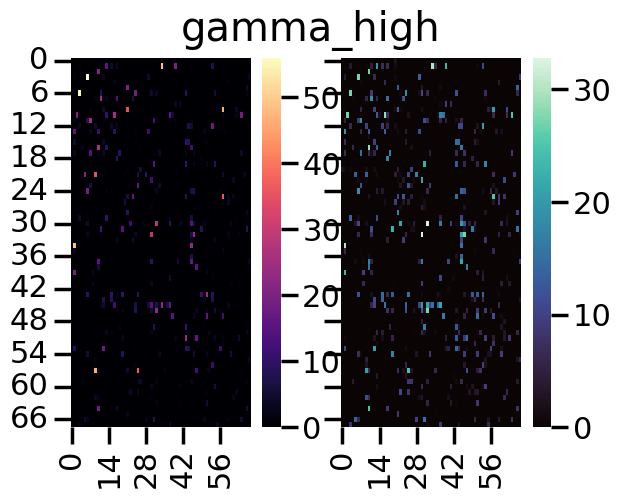

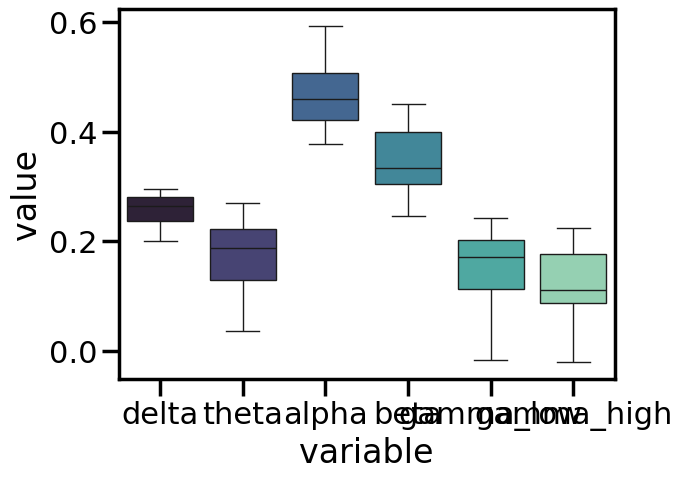

In [40]:
#%% Testing Lasso for ground truth
from importlib import reload
import Fun4RegCNN 
reload(Fun4RegCNN)

'''Aqui se hace una regresion linear usando Lasso. Los valores estan normalizados con respecto al
máximo global de cada banda. No se puede normalizar cada matriz de manera independiente porque 
perderiamos la "intensidad" relacionada con la diferencia de edades.

Lasso es, como cualquier regresion lineal, determinista. Esto quiere decir que siempre dara el mismo 
resultado. La ventaja de las es que si una variable no es explicativa, su peso asociado es CERO.
La pregunta es ¿Que tan estable es la seleccion de las variables explicativas si aleatorizamos los 
datos?'''
keys= list(connectomes_fc.keys()) #extraemos las etiquetas del diccionario para iterar sobre de ellas
LassoResults=pd.DataFrame( np.zeros((10,6)),columns=keys) #generamos un dataframe vacio
coeffsIntercepts=[] #list vacia para capturar los coeficientes e intersección de la regresión
coeffsMasks=[] # Los coeficientes son asociados a los valores de l
triu_index=np.triu_indices(68,k=1) #indices del triángulo superior de la matriz
for i,key in enumerate(keys):
    upper_triangle=connectomes_fc[key][:,triu_index[0],triu_index[1],0] #seleccionamos y vectorizamos el triangulo superior del las matrices
    upper_triangle /= np.max(upper_triangle,axis=None) #normalizamos
    Coeffs=[] #listas vacias para capturar los coeficientes
    Inter=[] # = las intersecciones
    Acc=[] # = el accuracy
    fig,ax = plt.subplots()
    for j in range(10):
        tt_split = train_test_split(upper_triangle, edad, test_size=.2, random_state=j) #separamos en train/test
        print(tt_split[0].shape)
        coeffs,inter, acc=Lasso_FC(tt_split,True,ax) #entrenamos el modelo y lo evaluemos. La función regresa los parametros de la recta y el acc
        Coeffs.append(coeffs) # adjunta
        Inter.extend(inter) #adjunta
        # Acc.extend(acc) #adjunta
        Acc.append(acc) #adjunta
    plt.title(key)
    mask=Coeff_Heatmaps(Coeffs) # Esta funcion regresa el promedio y el std de 
    #los coeficientes en su respectivo espacio en la matriz, para ver que tan estables son (son rete-estables)
    #Recordemos que antes vectorizamos los #pesos de la matriz de conectividad,
    #eso quiere decir que lasso agregará un "peso" a cada valor de conectividad.
    #Este peso puede ser mapeado nuevamente a su posicion en la matriz de conectividad.
    #Se llama "máscara" porque se sobreprondra sobre la matriz de conectividad para 
    #seleccionar los valores de connectividad que tengan un peso"
    mask[np.tril_indices(68,k=0)]=0 #seleccionamos el triangulo inferior (podría tomarse el superior, es igual)
    coeffsMasks.append(mask) #guardamos
    plt.suptitle(key) #ploteamos
    LassoResults[key]=np.array(Acc)
DataFrameMelted=pd.melt(LassoResults) #"derretimos" el dataframe. Sugiero leer, esta muy largo explicar xD
plt.figure()
sns.boxplot(x='variable',y='value',data=DataFrameMelted, palette='mako')

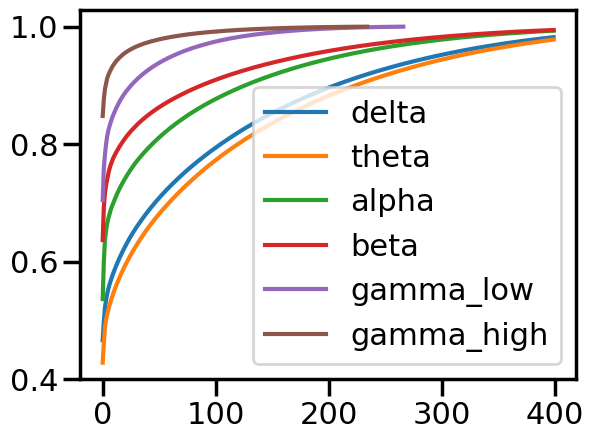

In [54]:
#%% Lets analize the coeffs. what if we use them as a mask to extract the features, PCA them and use MLP?
'''
Aquí primero seleccionamos los indices de los valores que no son ceros en la máscara, para luego
seleccionar esos mismos valores en las matrices de conectividad y vectorizarlos.

Para saber que tan explicativos son y si es posible reducir el número de dimensiones, se usó PCA.

Ya que delta, alfa y beta son las bandas que mejor predicen (segun Lasso), seleccionamos el número de PCAs
que de cada banda que explicaran almenos el 90%

Tendiendo eso se entreno un MLP.'''

#PCA
plt.figure()
for i,key in enumerate(keys):
    nonzero_index=np.nonzero(coeffsMasks[i]) #Seleccion de coeficientes != cero
    alpha_weigths = connectomes_fc[key][:,nonzero_index[0],nonzero_index[1],0] #mapeamos a la matriz de conectividad y vectorizamos
    pca_df, pca2use, prop_varianza_acum = myPCA(alpha_weigths, False, 120) #PCA
    plt.plot(prop_varianza_acum[:400],label=key) #graficamos el %de varianza explicada acumulada
plt.legend()

#seleccionamos el # de PCAs de cada banda (100,120,160)
nonzero_index=np.nonzero(coeffsMasks[0])
delta_weigths = connectomes_fc['delta'][:,nonzero_index[0],nonzero_index[1],0]
pca_df, pca_d, prop_varianza_acum = myPCA(delta_weigths, False, 100)
nonzero_index=np.nonzero(coeffsMasks[2])
alpha_weigths = connectomes_fc['alpha'][:,nonzero_index[0],nonzero_index[1],0]
pca_df, pca_a, prop_varianza_acum = myPCA(alpha_weigths, False, 120)
nonzero_index=np.nonzero(coeffsMasks[3])
beta_weigths = connectomes_fc['beta'][:,nonzero_index[0],nonzero_index[1],0]
pca_df, pca_b, prop_varianza_acum = myPCA(beta_weigths, False, 160)

features= np.concatenate((np.array(pca_d),np.array(pca_a),np.array(pca_b)),axis=1) #concatenamos los pca
x_train, x_test, y_train,y_test=train_test_split(features,edad,test_size=.2,random_state=726) #separamos en train-test
input_shape=x_train.shape[1]

Epoch 1/100
13/13 [==============================] - 3s 35ms/step - loss: 2772.3757 - mae: 49.4036 - val_loss: 1663.3979 - val_mae: 36.8584
Epoch 2/100
13/13 [==============================] - 0s 10ms/step - loss: 1626.8025 - mae: 35.8818 - val_loss: 771.8682 - val_mae: 21.9423
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 709.0254 - mae: 22.1250 - val_loss: 320.9850 - val_mae: 15.1474
Epoch 4/100
13/13 [==============================] - 0s 9ms/step - loss: 340.9930 - mae: 15.6979 - val_loss: 369.0984 - val_mae: 16.5040
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 337.3480 - mae: 15.6249 - val_loss: 383.1068 - val_mae: 16.7636
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 326.8428 - mae: 15.4840 - val_loss: 329.5573 - val_mae: 16.0009
Epoch 7/100
13/13 [==============================] - 0s 10ms/step - loss: 322.5113 - mae: 15.4347 - val_loss: 327.9607 - val_mae: 15.9796
Epoch 8/100
13/13 [==============

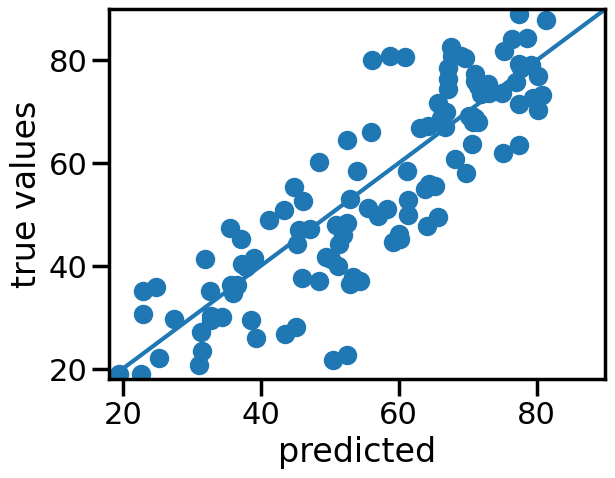

Acc=  0.8591793793012463


In [55]:
from importlib import reload
import Fun4RegCNN 
reload(Fun4RegCNN)

# utiliza los features 
model = Perceptron_PCA(input_shape)

# Compile the model
model.compile(optimizer=Adam(lr=.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model
predictions = evaluateRegModel(model,x_test,y_test,verbose=True)
acc = plotPredictionsReg(predictions,y_test,True)
print ('Acc= ',acc)

Epoch 1/100
23/23 [==============================] - 11s 337ms/step - loss: 1339.8372 - mae: 28.7833 - val_loss: 3213.6116 - val_mae: 53.4777
Epoch 2/100
23/23 [==============================] - 8s 329ms/step - loss: 338.6278 - mae: 15.4719 - val_loss: 3227.2861 - val_mae: 53.5857
Epoch 3/100
23/23 [==============================] - 8s 340ms/step - loss: 368.1322 - mae: 16.0484 - val_loss: 3223.4209 - val_mae: 53.5515
Epoch 4/100
23/23 [==============================] - 8s 344ms/step - loss: 307.8009 - mae: 14.6535 - val_loss: 3231.3740 - val_mae: 53.6183
Epoch 5/100
23/23 [==============================] - 8s 340ms/step - loss: 336.8302 - mae: 15.2113 - val_loss: 3216.7075 - val_mae: 53.4680
Epoch 6/100
23/23 [==============================] - 8s 327ms/step - loss: 289.3271 - mae: 14.0801 - val_loss: 3176.1741 - val_mae: 53.1143
Epoch 7/100
23/23 [==============================] - 7s 327ms/step - loss: 292.5977 - mae: 14.1137 - val_loss: 3125.6790 - val_mae: 52.6693
Epoch 8/100
23/23 

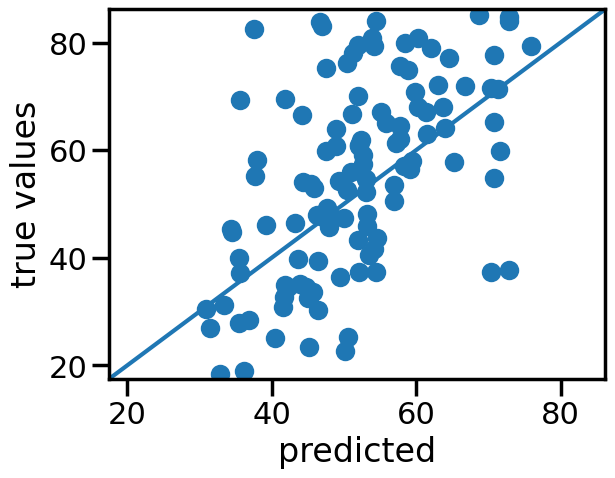

0.5493003767331166


In [56]:
# utiliza matrices de conectividad en rgb
connectome_rgb=Bands2rgb(['delta','alpha','beta'], connectomes_fc, Norm=True)
input_shape = connectome_rgb.shape[1:4]
x_train, x_test, y_train, y_test = train_test_split(connectome_rgb, edad, test_size=.2)

#%% training and testing

# Create the model
model = CNN_Sant(input_shape)

# Compile the model
model.compile(optimizer=Adam(lr=.001), loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Evaluate the model
predictions = evaluateRegModel(model,x_test,y_test)
acc = plotPredictionsReg(predictions,y_test,True)
print (acc)